<a href="https://csdms.colorado.edu"><img style="float: center; width: 75%" src="../../media/logo.png"></a>

## Diffusion
### Introduction

The diffusion equation can be used to represent a great deal of natural
and environmental processes. It was introduced by Fourier in 1822 to
calculate the distribution of the temperature in materials and has later
been applied by Fick to material science. The mathematical expression
that we will derive can be used to model e.g. heat transfer in the
earth's crust, soil evolution, transport of contaminant in an aquifer or
in the atmosphere, erosion of mountain ranges, the evolution of glaciers
and many other phenomena. But before describing the equation directly,
we will investigate what diffusion actually means.

Note: Lecture notes on diffusion are partly based on Prof. Dr. Frédéric Herman's course on geophysical processes. 
@author: Benjamin Campforts

#### Diffusion, what does it mean? 
The following movie illustrates Brownian motion, we can
see that the equation to derive for diffusion must enable us to
represent the movement of molecules from a high concentration zone to a
zone of low concentration (Movie 1): 

[![Brownian motion](../../media/diffusion.png)](https://www.youtube.com/watch?v=UhL9OsRSKO8 "Brownian motion")

**Movie 1:** Brownian motion causes food dye molecules to move throughout the water

If we simplify this is a graph, we would get the following: 
<img src="../../media/Diff_Fig1.png" style="width:3in;height:2in" />

**Figure 1**: Diffusion is the movement of molecules from a high
concentration zone to a zone of low concentration due to random
processes. C represents the concentration; X is the horizontal distance
and q is the net particle flow.

Due to diffusion, the particles move from the black zone to the grey
zone. This can be explained by the fact that each particle can move at
any moment in any direction, over a given distance. In one dimension, a
particle can move to the left or to the right with equal probability,
and this as well in the gray region as the black region. However, at the
transition from the black zone to the grey zone, the probability of
seeing particles move from left to right is much larger than the
opposite (because there are much more black particles). This causes a
particle transfer that depends on the difference of concentration $\Delta C$ and
the distance that the particle must travel $\Delta x$, where $\Delta C$ is the
difference of concentration in a transition zone of length $\Delta x$.
Therefore, we can see that the flow of particles (i.e. the number of
particles passing through per unit surface and time (in 2D, mol m<sup>-1</sup>
s<sup>-1</sup>) will depend on the concentration gradient. Over time,
the concentration changes as illustrated in Figure 2.

<img src="../../media/Diff_Fig2.png" style="width:3in;height:2in" />

**Figure 2:** Concentration changes over time due to diffusion

### Exercise 1: modeling the random movement of particles

Start by importing some libraries we will use

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

The goal of the first exercise is to replicate the process of diffusion by modeling the random movement of particles.

First, create a vector (called `xp`) that contains 100000 particles, having a random value between -20 and 20. 

In [3]:
nb = 100000
xp = np.random.rand(nb)*40-20

Represent this graphically using a histogram (use the `plt.hist()` function) and using the number of bins `xbins` (see below) in which you calculate the frequency (that is, the number of particles that is in each bin). Complete the code block below:

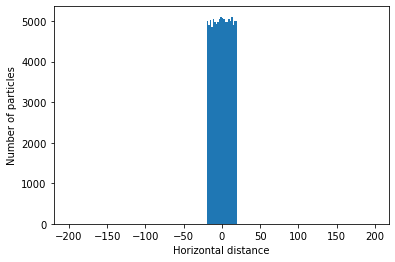

In [4]:
xbins = np.arange(-200,200,2) # The number of bins in which you calculate the frequency (i.e. the number of particles that is in each bin.) 
plt.hist(xp, bins=xbins)  # arguments are passed to np.histogram
plt.xlabel('Horizontal distance')
plt.ylabel('Number of particles')
plt.show()

Now, create a loop in which:
- each particle moves over a random distance (positive or negative). This distance varies from -2 to 2. Use the `random` function. 
- Run the loop 100 times (`nbT` =100). You will need two for loops (also referred to as nested for loops). 
- Plot the resulting distribution every 200 iterations (using the code you coded above). Fix the limits of the y axes (`plt.ylim()`) to better understand how the distribution changes with time. 
- Extra: can you find a way to check how long it takes to execute the loop (a timer)? 

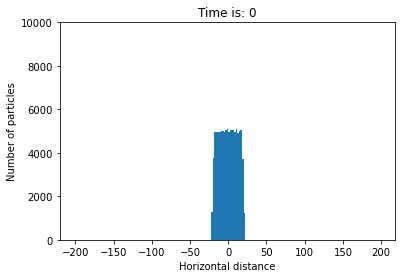

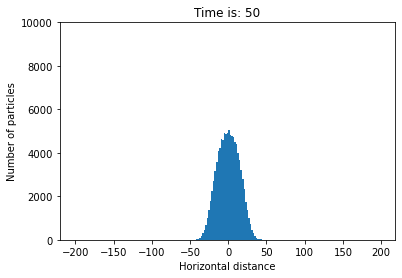

Elapsed time is: 6.405502796173096sec


In [5]:
nbT = 100
t_ini = time.time()
for t in range(0,nbT):
    for i in range(0,nb):
        xp[i] += random.random()*4-2
    if t%50==0:
        plt.figure()
        plt.hist(xp, bins=xbins)
        plt.title('Time is: ' +str(t))
        plt.xlabel('Horizontal distance')
        plt.ylabel('Number of particles')
        plt.ylim((0, 10e3))
        plt.show()
        
elapsed = time.time() - t_ini
print('Elapsed time is: ' + str(elapsed) +'sec' )

As you notice, this code is very slow. Vectorize your problem using numpy arrays to speed up the calculation and get rid of the inner for loop (you can keep the loop taking care of time). Change `nbT` to 10000 iterations

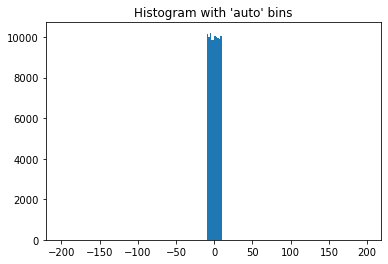

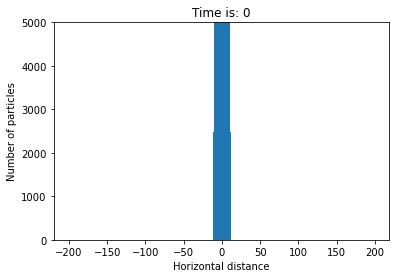

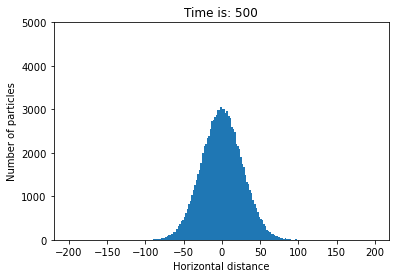

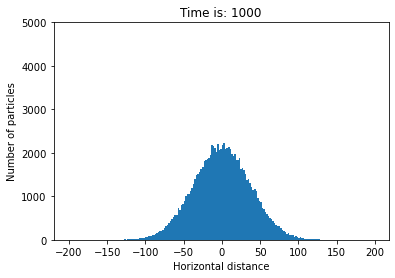

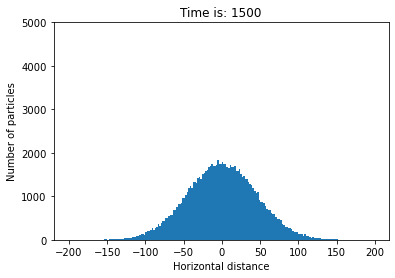

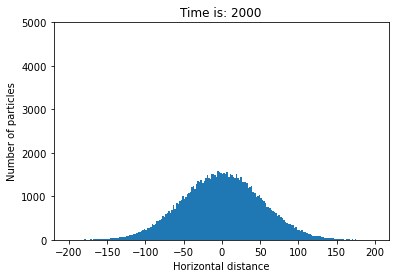

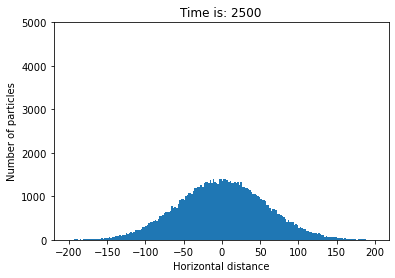

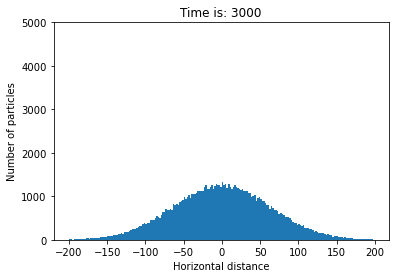

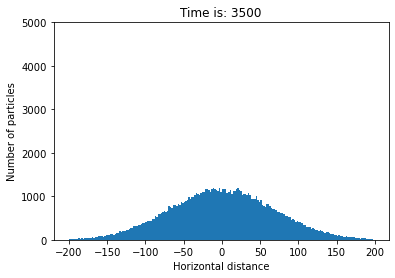

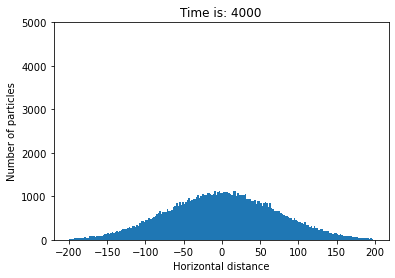

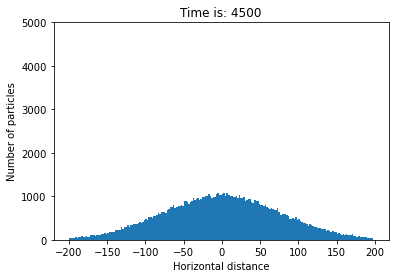

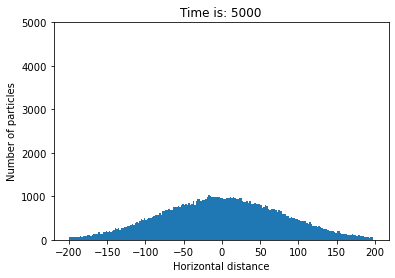

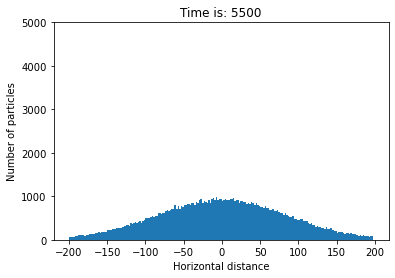

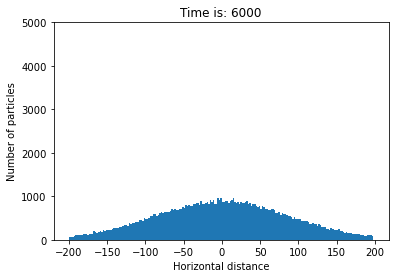

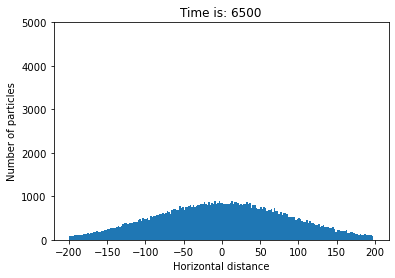

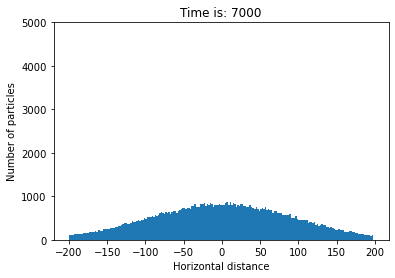

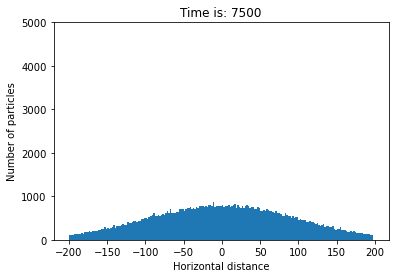

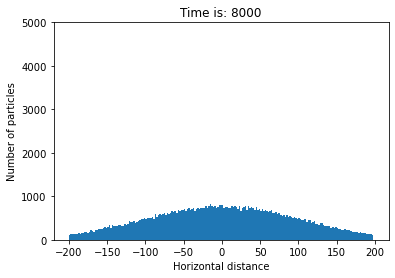

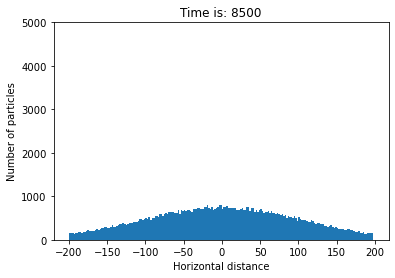

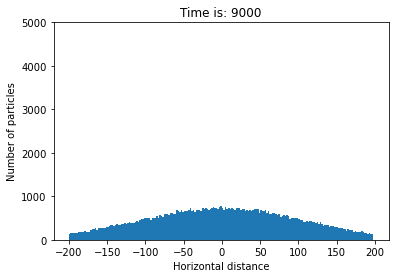

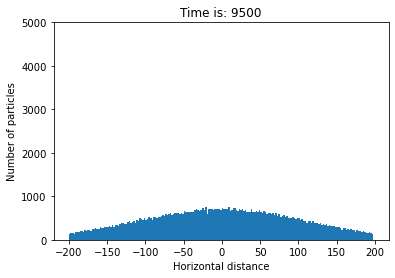

Elapsed time is: 20.695483922958374sec


In [6]:
# reset the seed to produce similar results 
random.seed(1)
np.random.seed(1)
nb = 100000
xp = np.random.rand(nb)*20-10
xbins = np.arange(-200,200,2)
plt.hist(xp, bins=xbins)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()
nbT = 10000
t_ini = time.time()

for t in range(0,nbT):
    xp += np.random.rand(nb)*4-2
    if t%500==0:
        plt.figure()
        plt.hist(xp, bins=xbins)
        plt.title('Time is: ' +str(t))
        plt.xlabel('Horizontal distance')
        plt.ylabel('Number of particles')
        plt.ylim((0, 5e3))
        plt.show()
        
elapsed = time.time() - t_ini
print('Elapsed time is: ' + str(elapsed) +'sec' )

Now that you have an efficient solution, answer the following questions:

1. Describe the evolution of the particles. How does the shape of the histogram evolve?
2. Why does the evolution of the histogram over time slows down?
3. What happens if the number of particles is reduced to 1000?
4. What happens if the distance of the displacement now varies randomly between -10 and 10? Why is this the case?


## Derivation of the diffusion equation

In the previous exercise, we modeled a particle transfer assuming a random particle shift. The solution showed that the change in particle distribution depends on the concentration difference $\Delta C$ and the distance the particle must travel $\Delta x$, where $\Delta C$ is the difference in concentration in the transition zone of length $\Delta x$ (Figure 2).

From these observations, we can thus conclude that particle flow, i.e. the number of particles passing through the side of an infinitesimal block per unit of time $\mathrm{(mol \: m^{-1} s^{-1})}$, will depend on the concentration gradient (Figure 2).

We can therefore say that the flux, $q$ is defined by:

$$q = -D\frac{\Delta C}{\Delta x} \label{eq:1} \tag{1}$$


where $D$ corresponds to the diffusion coefficient $\mathrm{(m^{2} s^{-1})}$, or the diffusivity. *C* represents the concentration or the number of elements in a 2-dimensional infinitesimal block $\mathrm{(mol \: m^{-2})}$. The diffusion coefficient will vary from one problem to another and defines the speed of particle transfer. Now, we would also like to know how the *concentration* changes during the calculations. Let's take an infinitesimal block with an incoming flow, and an outgoing flow (Figure 4).

<img src="../../media/Diff_Fig4.png" style="width:3in;height:2in"  />

**Figure 4:** Infinitesimal block with an incoming flow, and an
outgoing flow.

As the concentration varies in the *X* direction, the flow will be
different at the input and at the output of the block. The difference of
the number of particles in the block can therefore be derived from the
flux:

$$ \Delta (number \: of \: particles) = (q_x -q_{x+dx}\Delta Y \Delta t)\label{eq:A1} \tag{A1}$$

Note that the term $\Delta t$ appears because the flux dimensions are in $\mathrm{(mol \: m^{-1} s^{-1})}$ and that $\Delta (number \: of \: particles)$ is in mol.

We also know that the concentration change over an infinitesimally small
unit of time corresponds to the change in the number of particles for a
given volume:

$$ \Delta C=  \frac{\Delta (number \: of \: particles) }{\Delta X \Delta Y} \label{eq:A2} \tag{A2}$$

which gives:

$$ \Delta (number \: of \: particles) = \Delta C \Delta X \Delta Y \label{eq:A3} \tag{A3}$$

By combining Equation (\ref{eq:A1}) and (\ref{eq:A3}), we can write:

$$ (q_x -q_{x+dx}) \Delta Y \Delta t = \Delta C \Delta X \Delta Y  \label{eq:A4} \tag{A4}$$

$$ (q_x -q_{x+dx}) \Delta t = \Delta C \Delta X  \label{eq:A5} \tag{A5}$$


$$ \frac{\Delta C}{\Delta t} = \frac{q_x -q_{x+dx}}{\Delta X} \label{eq:A6} \tag{A6}$$

Using the definition of a differential equation:

$$ \frac{\delta q}{\delta x} = \frac{(q_{x+dx} -q_x)}{\Delta X} \label{eq:A7} \tag{A7}$$

We obtain the following equation (note the use of the $\partial$ symbol: we solve a PDE):

$$ \frac{\partial C}{\partial t} = -\frac{\partial q}{\partial x}  \label{eq:2} \tag{2}$$
By combining Eqs.(\ref{eq:1}) and (\ref{eq:2}), we finally obtain the heat
equation: 

$$ \frac{\partial C}{\partial t} = D\frac{\partial^2 C}{\partial x^2}  \label{eq:3} \tag{3}$$

which depends only on the curvature (i.e. the second derivative) of the concentration and the diffusion constant. Therefore, it is sufficient to know the diffusion coefficient $D$ (which can be measured) and to measure the curvature to estimate the change in concentration over time.

### Exercise 2: Change in concentration due to diffusion

You will now solve the diffusion equation and write a code that allows us to solve this equation. The change in concentration will be calculated over a distance $Lx$. There are two ways to do this, we can either calculate the second derivative directly (i.e. the curvature), or do it in two steps by calculating the flux (i.e. the first derivative of the concentration) and then the derivative of the flux. We will use the second method because it is easier to calculate a first derivative than a second derivative.

To be able to do the calculation we also need an initial condition (i.e. the starting concentration) and boundary conditions (i.e. the concentration in $x = 0$ and $x = Lx$). Finally, you will have to choose a time step that is small enough. The [Von Neumann stability analysis](https://en.wikipedia.org/wiki/Von_Neumann_stability_analysis) prescribes that $\Delta t$ must be smaller than $\frac{\Delta X^2}{2D}$. 

Now, try to solve the diffusion equation through discretization of ([Eq. 3](#mjx-eqn-eq:3)). 
Make the following assumptions: 
1. The initial condition:
    -   $C(x<=\frac{Lx}{2}) = 500 \: \mathrm{(mol \: m^{-2})}$
    -   $C(x>\frac{Lx}{2}) = 0 \: \mathrm{(mol \: m^{-2})}$
    -   $Lx = 30  \: \mathrm{m}$ or $Lx = 300   \: \mathrm{m}$
    -   $D  = 100 \:  \mathrm{(m^{2} s^{-1})}$
    -   $\Delta x = 0.1  \: \mathrm{m}$

2. Assumtions regarding the boundary conditions:
    -   $C(x=0)  = 500 \: \mathrm{(mol \: m^{-2})}$
    -   $C(x=Lx) = 0 \: \mathrm{(mol \: m^{-2})}$
    
The code to solve this exercise must have the following structure:

HINT: [Blog post on how to use NumPy arange](https://realpython.com/how-to-use-numpy-arange/)

0.0011904761904761904


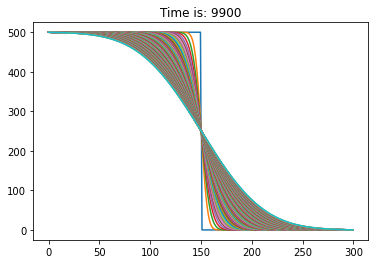

In [7]:
#physics
D = 100
Lx = 300
time =0

#numerical properties
dx = 0.5
x = np.arange(start=0, stop=Lx, step=dx)
nx =len(x)
nt = 10000
nout = 1000

# initial condition
# Choose an initial condition where C = C1 when x <= (Lx/2) and C = 0 when x > (Lx/2)
C1 = 500
C2 = 0
C =np.zeros_like(x)

C[x<=Lx/2] = C1
C[x>Lx/2] = C2

# Plot the initial concentration 
# plt.figure()
# plt.plot(x,C)
# plt.title('Initial condition')
# plt.show()

# impose a condition on the time step (Von Neumann stability criterion)
dt = dx*dx/D/2.1
print(dt)

#model run: solve the heat equation and plot the result.

# - make a time loop
for t in range(0,nt):
    # - in this loop, first calculate the flux by discretizing equation (1), 
    #   try to use vectorized code (using numPy diff statement)
    q = -D*np.diff(C)/dx
    
    # - Update the new concentration (Eq. 2, without changing the boundary values)
    #  Careful: which nodes do you have to update now? 
    C[1:-1] = C[1:-1] - dt*np.diff(q)/dx 
    
    # - plot intermediate results, but only for every 100 time steps
    if t%100==0:
        #plt.figure()
        plt.plot(x,C)
        plt.title('Time is: ' +str(t))
        
plt.show()

Now, try to answer the following questions: 

1. What is the shape of the concentration in equilibrium?
2. How long does it take to reach equilibrium?
3. Let *Lx* vary between 30 and 300, and *D* between 20 and 500. How does the time change to arrive at equilibrium according to *L* and *D*?

To be able to answer the questions, you can modify your code to assume a condition on the concentration that defines when the solution will have reached a state of equilibrium. To implement this, replace the loop 'for' with a while loop: 

~~~
Cp=C
it=0
diff=1e6

while ...: #(diff > 1e-4)
    it +=1 
    #update the time
    #calculate the flow with the discretized equation (eq. 1)
    #calculate the new concentration (eq. 2)(without changing the BC's)

    #check if the solution changes
    diff = # sum of absolute difference between Cp and C
    Cp = C
    #plotting (only every 10000 iterations)
~~~

dt is: 0.0011904761904761904


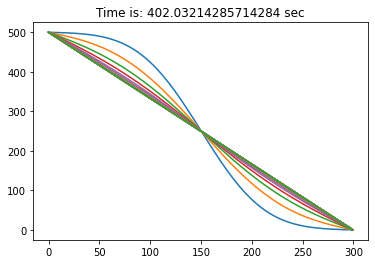

Difference at the end is: 9.999898912771421e-05


In [8]:
#physics
D = 100
Lx = 300
time =0

#numerical properties
dx = 0.5
x = np.arange(start=0, stop=Lx, step=dx)
nx =len(x)
nt = 10000
nout = 1000

C1 = 500
C2 = 0
C =np.zeros_like(x)

C[x<=Lx/2] = C1
C[x>Lx/2] = C2

dt = dx*dx/D/2.1
print('dt is: ' + str(dt))

C_n = np.zeros_like(C)
C_n[:] = C
diff = np.inf


it = 0
plt.figure()

while diff>1e-4:
    it+=1
    q = -D*np.diff(C)/dx    
    C_n[1:-1] = C[1:-1] - dt*np.diff(q)/dx     
    diff = np.sum(abs(C-C_n))
    C[:] = C_n
    if it%10000==0:        
        plt.plot(x,C)
plt.title('Time is: ' + str(it*dt) + ' sec')        
plt.show()
print('Difference at the end is: ' + str(diff))

## Practice your skills: Eyjafjallajokull- Part 1

<img src="../../media/Eyjafjallajokull.jpg" />

**Figure** "On March 2010 Eyjafjallajokull volcano in Iceland exploded into life, spewing lava, magma, rock and clouds of ash into the sky above it. The disaster grounded airlines, stranding holidaymakers and business passengers across Europe and North America. While many could only watch the crisis unfolding in hotels and airports, photographer Ragnar Th. Sigurdsson chose to fly into the epicentre on a mission to record one of nature's most deadly phenomena" The Telegraph (c); Picture: RAGNAR TH. SIGURDSSON / BARCROFT 

Exercise: 1-D  diffusion
The Eyjafjallajökull volcano is located at the Southern Iceland coast and 2000 km from Brussels. Consider a one-dimensional case with a domain length of 5000 km. The volcano itself is situated at 2220 km from the left boundary of the simulation domain. Brussels is situated at 4220 km from the left boundary of the simulation domain. Choose a spatial resolution of 20 km. In the next couple of steps, you will calculate the time required to obtain a specific ash concentration above Brussels. 

<img src="../../media/Situation1D.png" />

**Figure:** 1D situation sketch

Solve the spread of ash using the diffusion equation (Eq. 3)

Define the model parameters: 
- set the diffusivity to 25 km$^2$/h
- define the model domain: total length is 5000 km, spatial resolution is 20 km
- calcualte the location (index in the np array) of the volcano and of Brussels and call the variables respectively `ind_vol` and `ind_Bru`
- Set the initial conditions (C): at the volcano the concentration is 100 ppm, over the rest of the domain the concentration is 0 ppm.
- The Eyjafjallajökull volcano produced ashes almost continuously during a couple of weeks. Start from the initial condition above but now add 100 ppm ashes per hour to the volcano grid cell as a source term. 
- Assume Dirichlet boundary conditions (0 ppm at 0 km and 0 ppm at 3000 km)
- Plot the initial concentration, also indicate the location of Brussels on the plot (HINT use `plt.scatter()`)
- Calculate and print out the time step (dt) using the CFL criterion

dt is: 6.4hours


<Figure size 432x288 with 0 Axes>

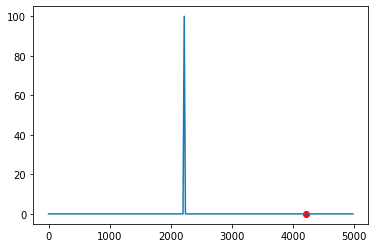

<Figure size 432x288 with 0 Axes>

In [9]:
#physics
D = 25
Lx = 5000
time =0

#numerical properties
dx = 20
x = np.arange(start=0, stop=Lx, step=dx)
nx =len(x)
nt = 10000
nout = 1000

# Location of volcano and Brussels
ind_vol= int(2220/dx)
ind_Bru= int(4220/dx)

C_ini  = 100
C_rate = 100
Cstart = 0
Cend  = 0
C =np.zeros(x.shape)

C[0] = Cstart
C[ind_vol] = C_ini
C[-1] = Cend

plt.figure()
plt.plot(x,C)
plt.scatter(x[ind_Bru],C[ind_Bru],c='r')

dt = dx*dx/D/2.5
print('dt is: ' + str(dt) + 'hours')

it = 0
plt.figure()

- After how many hours do we get 5 ppm ash aerosols in Brussels?
- Is this realistic? 

Use the code derived above to solve this question (the while loop). Plot the output every 100 iterations

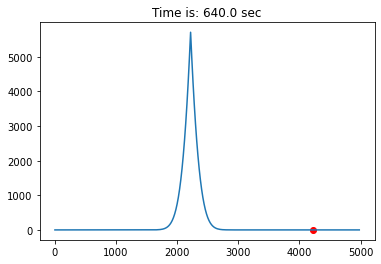

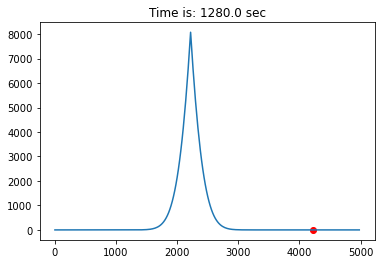

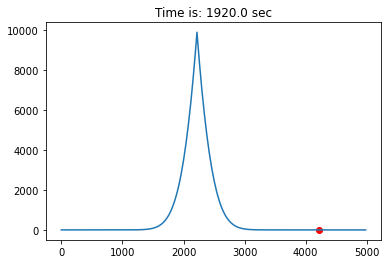

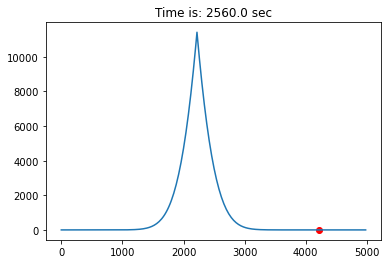

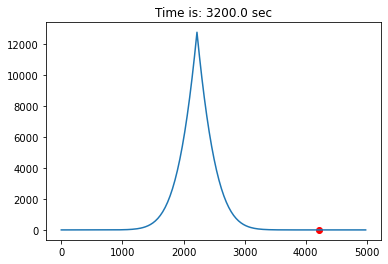

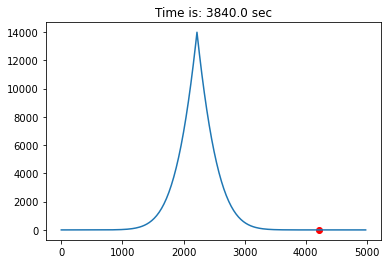

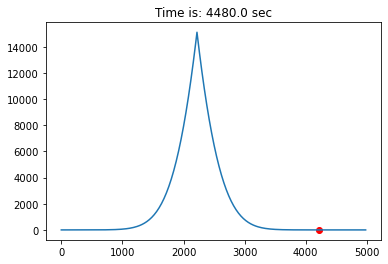

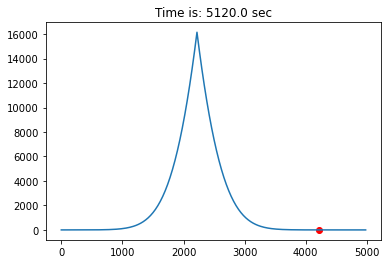

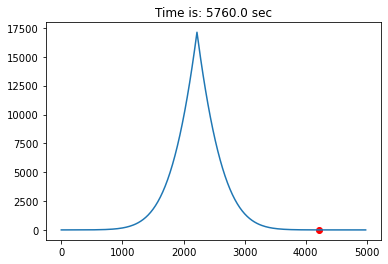

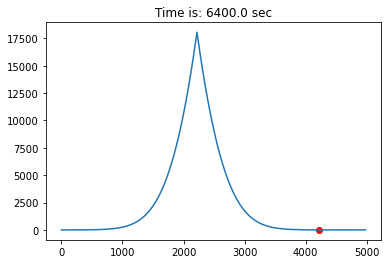

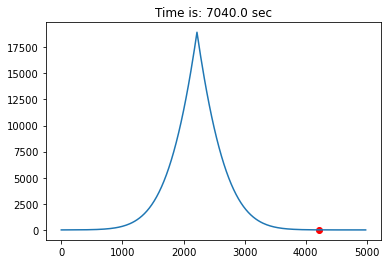

Concentration reached after: 7136 hours
or : 297 days


In [10]:
it =0 

while C[ind_Bru]<5:
    it+=1
    q = -D*np.diff(C)/dx    
    C[1:-1] = C[1:-1] - dt*np.diff(q)/dx  
    
    # Source term
    C[ind_vol] += C_rate*dt
    
    # Boundary conditions
#     C[0] = Cstart
#     C[-1] = Cend

    
    if it%100==0:        
        plt.plot(x,C)
        plt.scatter(x[ind_Bru],C[ind_Bru],c='r')
        plt.title('Time is: ' + str(it*dt) + ' sec')    
        plt.show()
            
print('Concentration reached after: ' + str(int(it*dt)) + ' hours')
print('or : ' + str(int(it*dt/24)) + ' days')